In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumtrapz
from scipy.fftpack import fft

In [2]:
def plot_z_axis_movement(df, samle_rate = 50):
    
    # Define Time array start, stop, space
    # starting time = 0 / stop time = total sample * ( 1 / sample_frequency)
    # test = np.linspace(0,10,11) 
    # syntax : array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
    time = np.linspace(0, len(df)/sample_rate, len(df))
    
    # Z-axis acceleration data
    acceleration_z = df['userAcceleration.z']
    
    # Calculate Speed by integrating acceleration
    # sample_rate =50Hz
    speed_z = cumtrapz(acceleration_z, dx = 1/samle_rate, initial = 0)
    
    # Calculate Position by integrating speed
    position_z = cumtrapz(speed_z, dx = 1/sample_rate, initial = 0)
    
    # FFT for frequency domain representation
    # sp complex number by fft
    # freq 
    sp = np.fft.fft(acceleration_z)
    freq = np.fft.fftfreq(len(sp), 1 / sample_rate)
    
    #Create subplots
    fix, axs = plt.subplot(4, 1, figsize = (12, 16))
    
    # Plotting Acceleration in Z-axis
    axs[0].plot(time, acceleration_z, label = 'Acceleration (Z-axis)', color = 'b')
    axs[0].set_title('Acceleration in Z-axis')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acceleration (m/s^2)')
    
    # Plotting Speed in Z-axis
    axs[1].plot(time,speed_z, label = 'Speed (Z-axis)', color = 'g')
    axs[1].set_title('Speed in Z-axis')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Speed (m/s)')

    # Plotting Position in Z-axis
    axs[2].plot(time, position_z, label = 'Position (Z-axis)', color = 'r')
    axs[2].set_title('Speed in Z-axis')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Speed (m/s)')

    # Plotting Frequency vibration
    axs[3].plot(freq[freq > 0], np.abs(sp[freq > 0]), labe = 'F')

<AxesSubplot:xlabel='Time'>

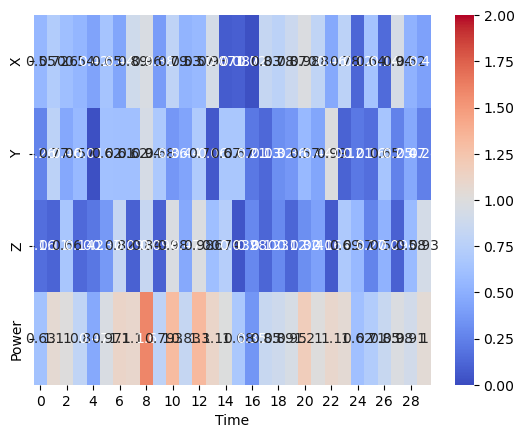

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

# Generate random acceleration data for x, y, and z axes over 30 seconds
# Let's assume the data is sampled at 1 Hz, so we have 30 data points for each axis
np.random.seed(0)
time = np.arange(0, 30, 1)
x_data = np.random.rand(30)
y_data = np.random.rand(30)
z_data = np.random.rand(30)
power = np.sqrt(x_data**2 + y_data**2 + z_data**2)

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'X': x_data, 'Y': y_data, 'Z': z_data, 'Power' : power})

# Generate the heatmap
sns.heatmap(df.set_index('Time').T, annot=True, cmap='coolwarm', vmin = 0, vmax = 2)


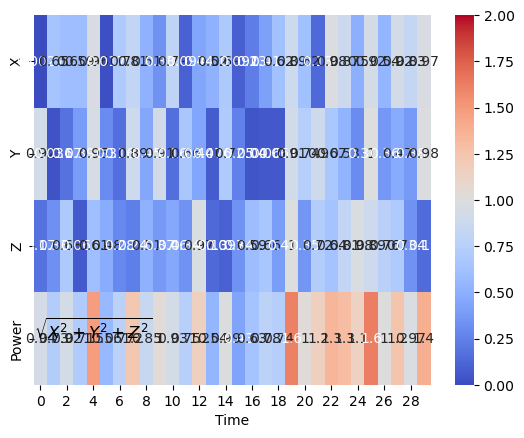

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate random acceleration data
time = np.arange(0, 30, 1)
x_data = np.random.rand(30)
y_data = np.random.rand(30)
z_data = np.random.rand(30)

# Calculate the "Power" factor
power_data = np.sqrt(x_data**2 + y_data**2 + z_data**2)

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'X': x_data, 'Y': y_data, 'Z': z_data, 'Power': power_data})

# Generate the heatmap
ax = sns.heatmap(df.set_index('Time').T, annot=True, cmap='coolwarm', vmin=0, vmax=2)

# Add formula text annotation below the 'Z' row
ax.text(0, 3.5, r'$\sqrt{X^2 + Y^2 + Z^2}$', fontsize=12)

plt.show()


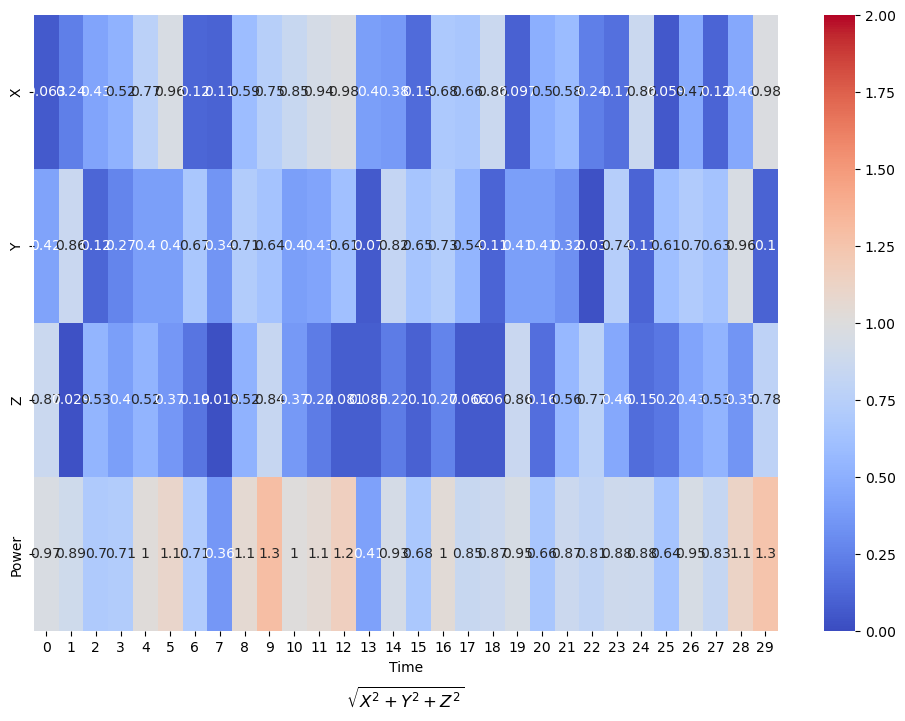

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate random acceleration data
time = np.arange(0, 30, 1)
x_data = np.random.rand(30)
y_data = np.random.rand(30)
z_data = np.random.rand(30)

# Calculate the "Power" factor
power_data = np.sqrt(x_data**2 + y_data**2 + z_data**2)

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'X': x_data, 'Y': y_data, 'Z': z_data, 'Power': power_data})

# Increase figure size to accommodate annotations
plt.figure(figsize=(12, 8))

# Generate the heatmap
ax = sns.heatmap(df.set_index('Time').T, annot=True, cmap='coolwarm', vmin=0, vmax=2)

# Add formula text annotation below the 'Z' row, adjust the position
ax.text(len(time) / 2, 4.5, r'$\sqrt{X^2 + Y^2 + Z^2}$', fontsize=12, ha='center')

plt.show()


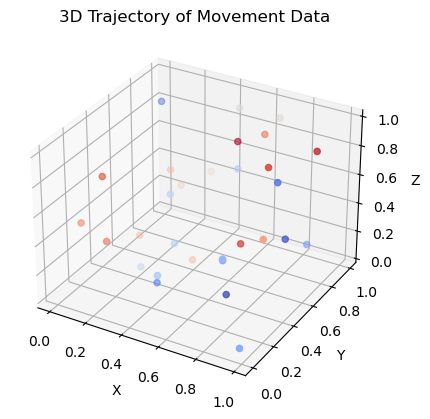

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random acceleration data (as before)
time = np.arange(0, 30, 1)
x_data = np.random.rand(30)
y_data = np.random.rand(30)
z_data = np.random.rand(30)

# Create a DataFrame (as before)
df = pd.DataFrame({'Time': time, 'X': x_data, 'Y': y_data, 'Z': z_data})

# Create a new figure
fig = plt.figure()

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['X'], df['Y'], df['Z'], c=df['Time'], cmap='coolwarm')

# Adding labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory of Movement Data')

# Show plot
plt.show()
